In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
import matplotlib.animation

In [2]:
def make_plot(title='', x_label='', y_label='', z_label='', x_lim=(0, 0), y_lim=(0,0), z_lim=(0,0), grid=True, size=(8, 5), dpi=115, three_d=False):
    '''
    Generates a plot object
    
    Parameters:
        title - (string) title of the plot
        x - (float) a list of values for omega/omega_0
        y - (float) a list of values for the amplitude
        xlim - (float) the limit for the x axis, this is a list containing 2 variables, 
                    the max and min value of x
        ylim - (float) the limit for the y axis, this is a list containing 2 variables, 
                    the max and min value of y
        size - (int) resizing the figure of the plot
        dpi - (int) increasing the quality of the image produced
    Returns:
        plot - (object) the plot
    '''
    fig = plt.figure(figsize=(size[0], size[1]), dpi=dpi, facecolor='0.9')
    plot = fig.add_subplot(111) if not three_d else fig.add_subplot(111, projection='3d')
    
    plot.set_title(title)
    if y_lim[0] != 0 and y_lim[1] !=0: plot.set_ylim(y_lim[0], y_lim[1])
    if x_lim[0] != 0 and x_lim[1] !=0: plot.set_xlim(x_lim[0], x_lim[1])
    if z_lim[0] != 0 and z_lim[1] !=0: plot.set_zlim(z_lim[0], z_lim[1])
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    if three_d: plot.set_zlabel(z_label)
    if grid: plt.grid()
    
    return plot



In [3]:
def LCM(A=None, C=None, M=None, I=None):
    if A is not None:
        LCM.A = A
        
    if C is not None:
        LCM.C = C
        
    if M is not None:
        LCM.M = M
    
    if I is not None:
        LCM.I = I
    
    In = (LCM.A*LCM.I+LCM.C)%LCM.M 
    
    LCM.I = In
    
    return In 


def correlation_plot(A,C,M,I0=3):
    LCM(A, C, M, I0)
    test = []

    for n in range(10000):
        test.append(LCM())
    
    test1 = np.roll(test,1)[0:]
    test = test[0:]
    AC_plot(test)
    
    f,ax = plt.subplots(1,1, figsize=(10,10))
    plt.scatter(test, test1, s=0.7);
    plt.show()
    return

def plot_TDR_AC(rand_func, args=None):
    
    # Generate random numbers
    rnd_nums = []
    for n in range(10000):
        if args == None:
            rnd_nums.append(rand_func())
        else:
            rnd_nums.append(rand_func(*args))
    
    # Create autocorrelation list
    k = np.arange(100)
    AC_values = []
    
    for value in k[1:]:
        AC_values.append(autocorrelation(rnd_nums,value))
    
    # Plot
    f,ax = plt.subplots(2,1, figsize=(20,10), facecolor='0.9')
    ax[0].scatter(range(len(rnd_nums)),rnd_nums, s=0.8)
    ax[0].set_xlabel("$N$")
    ax[0].set_ylabel("$N^th$ Random Number")
    ax[1].plot(k[1:], AC_values)
    plt.show()
    
    return

def autocorrelation(x, k):
    x_shifted = np.roll(x,-k)[:-k]
    x = np.array(x)[:-k]
    avg = np.mean(x)
   
    num = np.sum((x-avg)*(x_shifted-avg))
    denom = np.sum((x-avg)**2)
        
    return num/denom

def AC_plot(x):
    k = np.arange(1,100)
    AC_values = []
    
    for value in k:
        AC_values.append(autocorrelation(x,value))
        
    plt.plot(k, AC_values)
    
    return

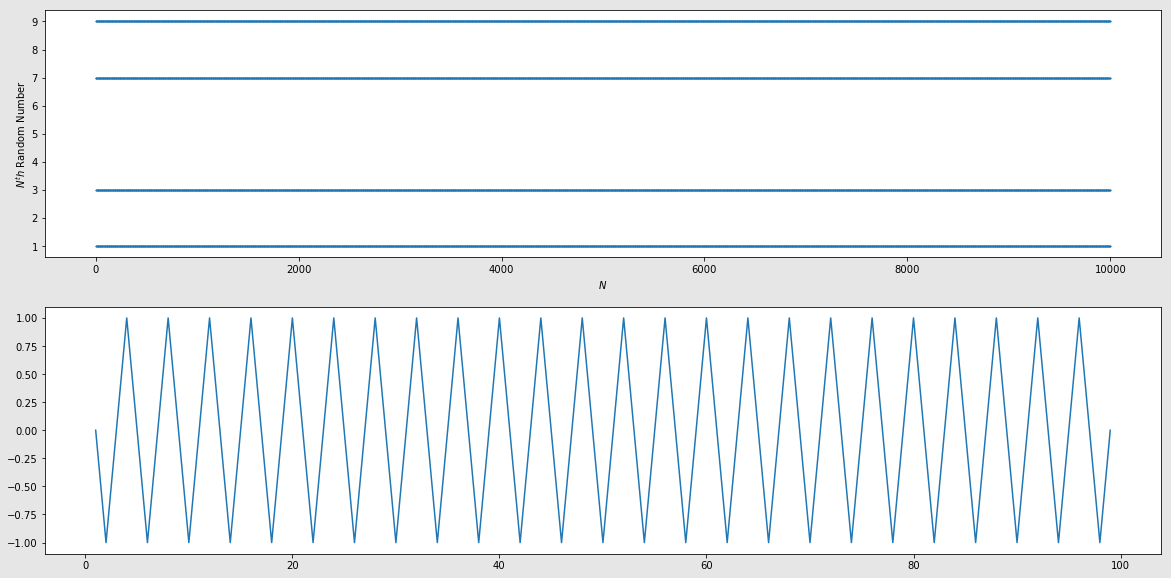

In [4]:
A =7
C = 0
M = 10
I0 = 3

LCM(A, C, M, I0)

plot_TDR_AC(LCM)

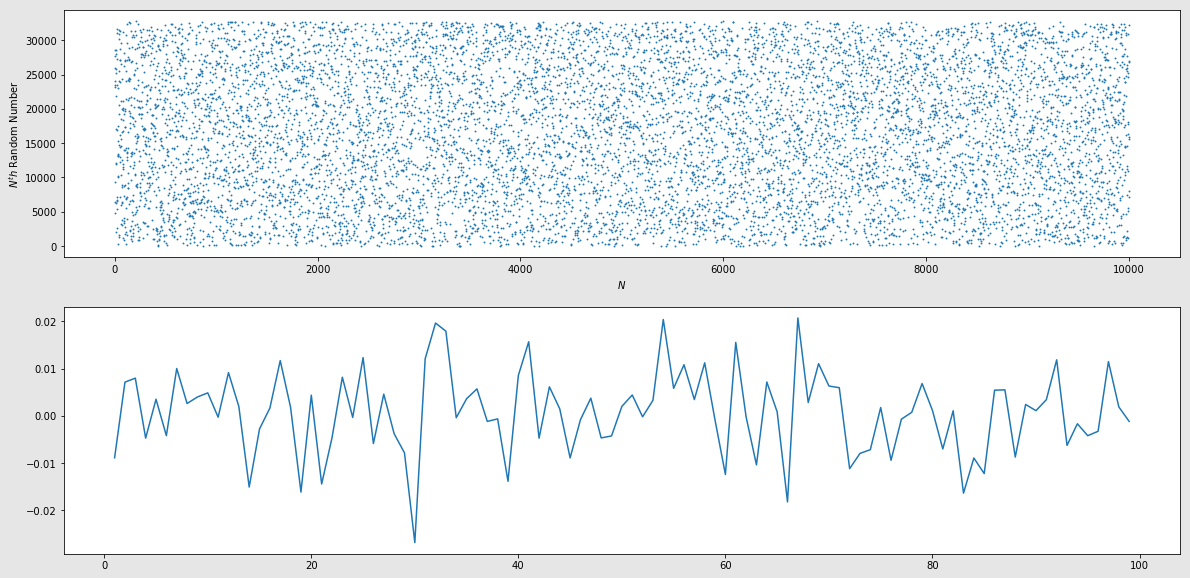

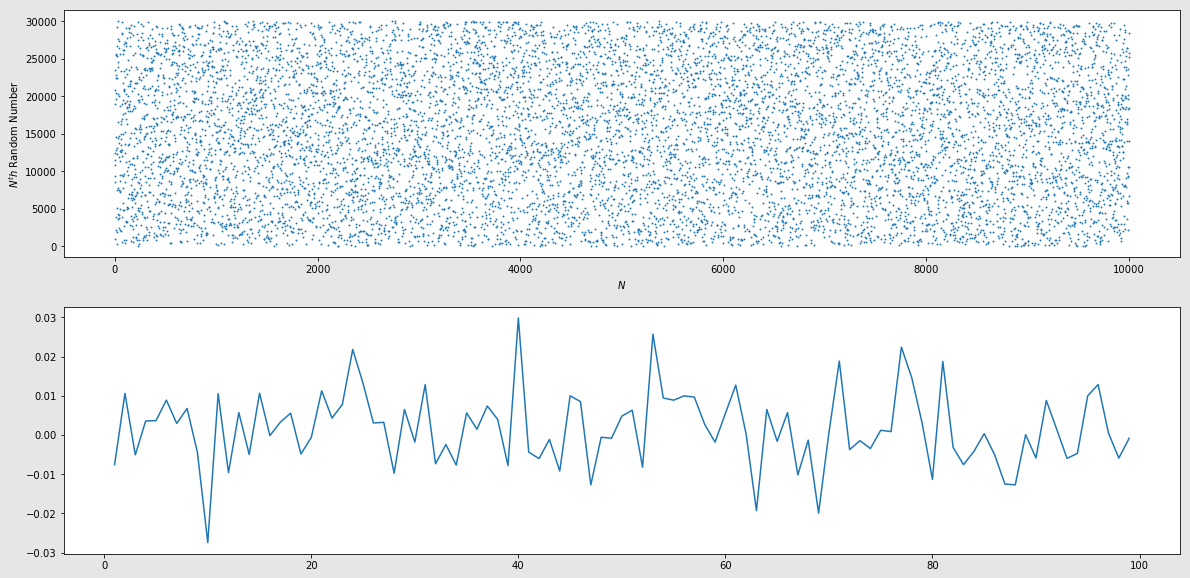

In [5]:
A =1103515245
C = 12345
M = 32768
I0 = 3

LCM(A, C, M, I0)

plot_TDR_AC(LCM)
plot_TDR_AC(np.random.randint, args=(30000,))

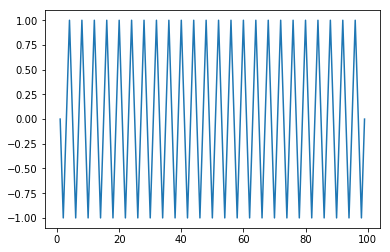

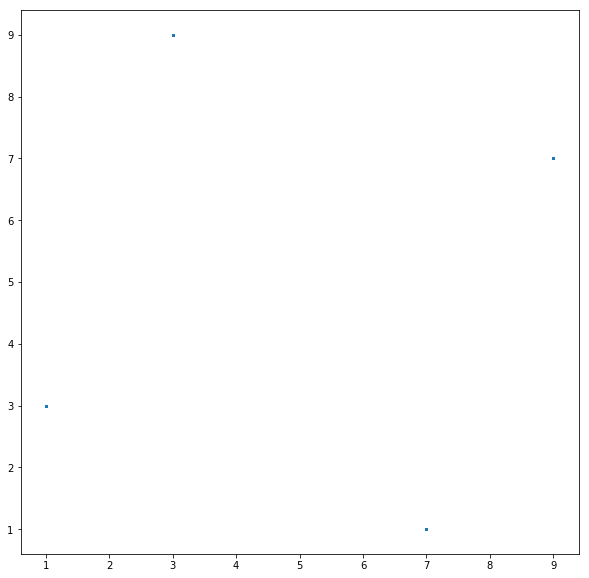

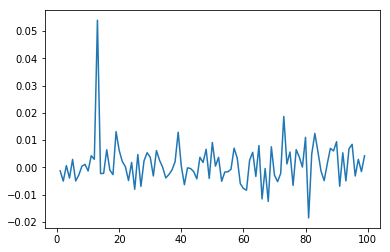

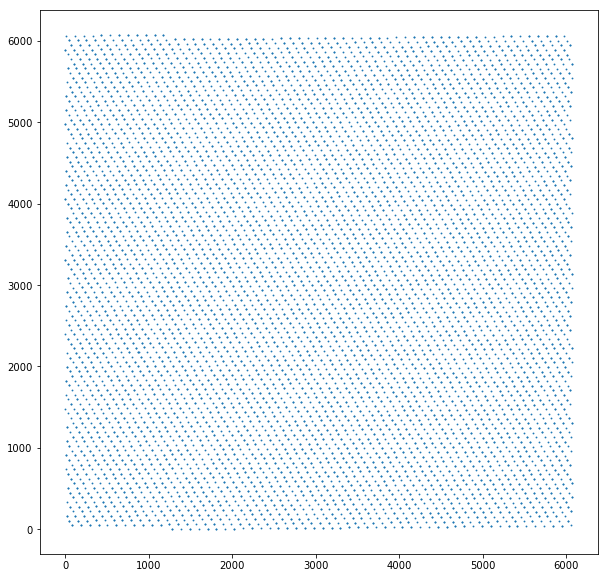

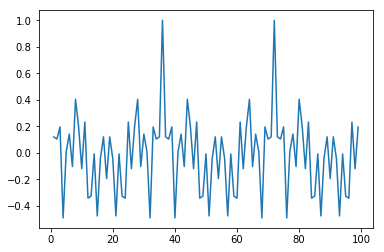

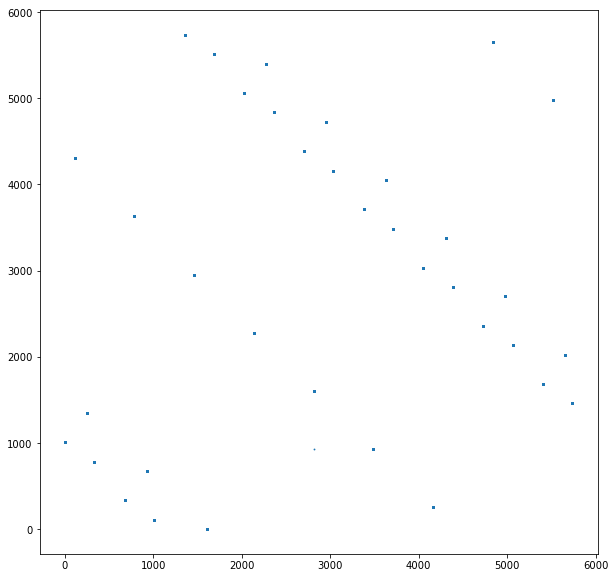

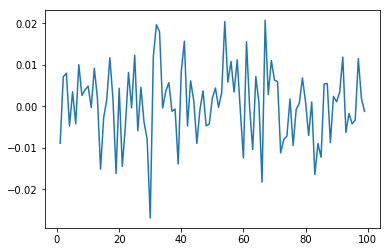

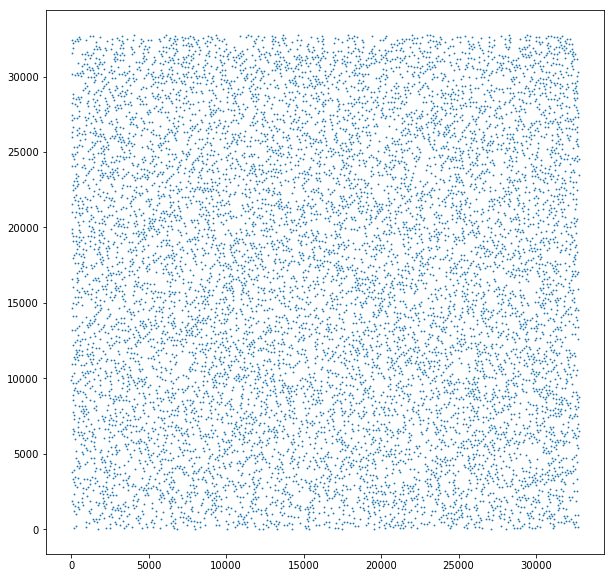

In [6]:
correlation_plot(7,0,10,3)
correlation_plot(106,1283,6075,3)
correlation_plot(107,1283,6075,3)
correlation_plot(1103515245,12345,32768,3)

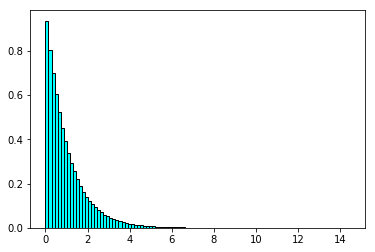

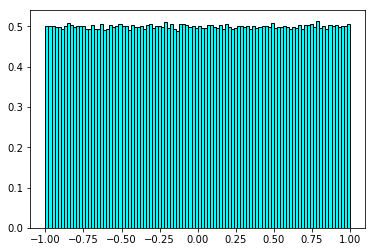

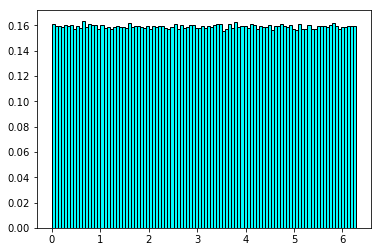

In [5]:
def tau(u):
    return -np.log(1-u)

def mu(u):
    return 1-2*u

def phi(u):
    return 2*np.pi*u

u = np.random.rand(10**6)
plt.hist(tau(u), color="cyan", ec='black', bins=100, normed=True)
plt.show()
plt.hist(mu(u), color="cyan", ec='black', bins=100, normed=True)
plt.show()
plt.hist(phi(u), color="cyan", ec='black', bins=100, normed=True)
plt.show()

In [75]:
def RT(m, p, z_max=1, tau_max=10, prob=0.5, nsteps=100):
    x, y, z = np.zeros(*m.shape), np.zeros(*m.shape), np.zeros(*m.shape)
    mu_exited = np.empty(0)
    
    for i in range(nsteps):
        t = tau(np.random.rand(*m.shape))
        L = t*z_max/tau_max
        theta = np.arccos(m)
        
        x = x + L*np.sin(theta)*np.cos(p)
        y = y + L*np.sin(theta)*np.sin(p)
        z = z + L*np.cos(theta)
        
        
        exited_mask = z > z_max
        if np.sum(exited_mask) > 0: mu_exited = np.append(mu_exited, m[exited_mask])
        
        dead_mask = np.random.rand(*m.shape) <= prob
        dead_mask |= exited_mask 
        dead_mask |= z < 0
        
        x[dead_mask] = 0
        y[dead_mask] = 0
        z[dead_mask] = 0
        
        u = np.random.rand(*m.shape)
        m, p = mu(u), phi(u)

    return mu_exited

u = np.random.rand(10**8)
m, p = mu(u), phi(u)

exited = RT(m, p)
print(exited)
plt.hist(exited)
plt.show()




KeyboardInterrupt: 

In [66]:
u = np.random.rand(1)
print(*u.shape)

1
